In [1]:
%load_ext Cython
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def culc_fdm(m):

    h=1/m
    x=[i*h for i in range(m)]

    x=np.array(x)
    b=np.sin(np.pi*x)*(h**2)*(np.pi)**2
    b[0]=0
    b[-1]=0

    diagonal_component=np.full(m,2)
    diagonal_component[0]=1
    diagonal_component[-1]=1

    diagonal_other=np.full(m-1,-1)
    diagonal_other[0]=0
    diagonal_other[-1]=0

    a=np.zeros((m,m))+np.diag(diagonal_component)+np.diag(diagonal_other,k=1)+np.diag(diagonal_other,k=-1) #係数行列

    return np.linalg.solve(a,b)


In [3]:
def cul_err(m):
    x=np.linspace(0,1,m)
    true_u=np.sin(np.pi*x)
    u=culc_fdm(m)

    return np.max(np.abs(true_u-u))/np.max(np.abs(true_u))


[]

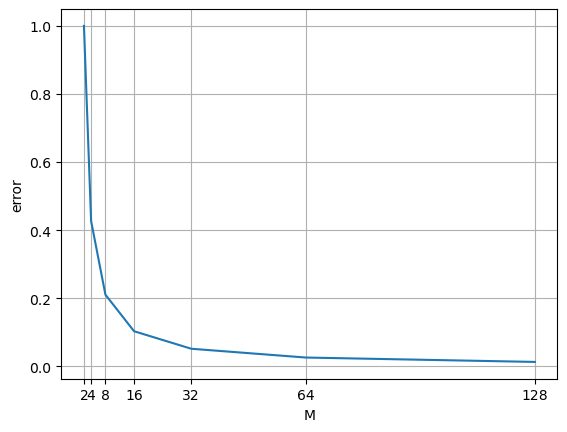

In [10]:
m=[2**i for i in range(1,8)]
err=[cul_err(i) for i in m]

plt.plot(m,err)
plt.xlabel("M")
plt.ylabel("error")
plt.xticks(m)
plt.grid()
plt.savefig("1SC22317Y06a03.pdf")
plt.plot()